# 第 2 章 机器学习基本理论

## 2.1 机器学习三要素

在大多数教材里，一种机器学习方法可以拆成三个部分：

```text
机器学习方法 = 模型（model） + 策略（strategy） + 算法（algorithm）
```

* **模型（model）**：
  用来“拟合数据”的数学表达式或结构，比如线性回归、决策树、神经网络。
  可以理解成：给定输入 X，它算出一个输出 f(X)。

* **策略（strategy）**：
  用来评价“哪个模型更好”的标准。
  最常见就是用一个 **损失函数** / **评价指标**，比如均方误差、准确率等。

* **算法（algorithm）**：
  在给定策略的前提下，用来 **求出最优模型参数** 的实际步骤。
  比如：最小二乘法、梯度下降法、牛顿法等。

想清楚“模型-策略-算法”这三件事，可以帮助你系统地理解：

> “我到底在学什么？是在学一个模型？一个评估标准？还是一个求解方法？”

## 2.2 机器学习方法分类

机器学习方法非常多，没有一个统一的大一统体系，但可以从不同角度来分类。

### 2.2.1 按监督方式

* **有监督学习（Supervised Learning）**
  有特征 X，也有标签 y，比如分类、回归。
  典型算法：线性回归、逻辑回归、SVM、随机森林、神经网络等。

* **无监督学习（Unsupervised Learning）**
  只有特征 X，没有标签 y，主要用来“发现结构、做聚类、降维”。
  典型算法：K-means、聚类、PCA、AutoEncoder 等。

* **半监督学习（Semi-Supervised Learning）**
  少量有标签数据 + 大量无标签数据。

* **强化学习（Reinforcement Learning）**
  模型和环境交互，通过“奖励”不断调整策略。

### 2.2.2 按模型性质

* **概率模型 / 非概率模型**：
  是否显式建模 `P(Y | X)` 或 `P(X, Y)`。
* **线性 / 非线性模型**：
  输出是否是输入的线性组合（在线性空间下）。

### 2.2.3 按学习技巧

* **贝叶斯学习**：基于贝叶斯公式，通过先验 + 似然得到后验。
* **核方法**：用核函数把数据“隐式映射”到高维空间，再做线性学习。

你在选择算法时，经常会同时从“是否有标签”、“模型是否线性”、“是否用到核/贝叶斯”等多个角度来判断。

## 2.3 监督学习建模流程

以最常见的 **监督学习** 为例，整体流程可以概括为：

1. **收集数据**：拿到训练集 `(X, y)`。
2. **特征工程**：清洗数据、构造特征、特征选择/降维等。
3. **选择模型和损失函数**：比如线性回归 + 均方误差。
4. **选择算法并训练模型**：比如用梯度下降求解最优参数。
5. **模型评估与调参与优化**：用验证集、交叉验证、调超参数。
6. **在测试集上评估泛化性能**。
7. **部署与上线**：将训练好的模型用于实际预测。

做任何一个监督学习项目时，都可以按上面这条“流水线”一步步走。

## 2.4 特征工程

### 2.4.1 什么是特征工程？

**特征工程（Feature Engineering）**：
把原始数据加工成“模型更好理解”的特征，从而提升模型效果。

简单说：

> 把“乱糟糟的原始数据”变成“含义清晰、对预测有帮助的数字”。

特点：

* 强依赖 **领域知识**；
* 通常是一个 **反复试错、不断迭代** 的过程；
* 和具体模型有关，不同模型适合不同形式的特征。

### 2.4.2 特征工程的内容

#### 1）特征选择

**目的**：
从大量特征中挑出 **有用的**，去掉 **冗余、噪声、无关特征**，降低维度、减少过拟合。

> 注意：特征选择只“选”，不“造”新特征。

常见方法：

* **过滤法（Filter）**：
  用统计量直接筛特征，比如：

  * 相关系数
  * 卡方检验
  * 信息增益等

* **包裹法（Wrapper）**：
  用一个模型来评估特征子集的重要性，比如递归特征消除（RFE）。

* **嵌入法（Embedded）**：
  模型在训练时就自带“特征选择能力”，比如：

  * 决策树特征重要性
  * L1 正则化（Lasso）压缩部分特征系数为 0

#### 2）特征转换

目标：让特征 **更适合模型的输入要求**。

常见操作：

* **归一化（Normalization）**
  把数值缩放到一个固定范围（如 `[0, 1]`）。
  典型场景：KNN、SVM、神经网络等对尺度敏感的模型。

* **标准化（Standardization）**
  让特征满足“均值约为 0，标准差约为 1”。
  常见做法：
  `x_standard = (x - mean) / std`

* **对数变换**
  对偏态分布（如收入、价格）取 log，让分布更接近正态，减弱极端值影响。

* **类别变量编码**

  * **独热编码（One-Hot）**：适合无序类别，如颜色：`[red, green, blue]`。
  * **标签编码（Label Encoding）**：把类别映射到整数，常用于有序类别。
  * **目标编码（Target Encoding）**：用某类别对应的目标变量的平均值等统计量代替。
  * **频率编码（Frequency Encoding）**：用类别在数据中出现的频率代替。

#### 3）特征构造

从已有特征中**创造新特征**，让模型更容易学到有用模式。

常见类型：

* **交互特征**：
  比如收入 × 年龄、价格 × 数量、特征 A + 特征 B 等。

* **统计特征**：
  在时间序列 / 分组数据中取：均值、最大值、最小值、标准差等。

* **时间与日期特征**：
  从时间戳中抽出：星期几、月份、是否节假日、是否月初/月末等。

#### 4）特征降维

当特征维度太高时：

* 计算慢；
* 模型容易过拟合（“维度灾难”）。

通过降维，可以压缩维度，同时尽量保留主要信息。

常见方法：

* **PCA（主成分分析）**：线性降维，保留方差最大的方向。
* **LDA（线性判别分析）**：监督式降维，考虑类之间距离。
* **t-SNE**：非线性降维，常用于高维数据可视化。
* **自编码器（AutoEncoder）**：用神经网络自动学习压缩表示。

### 2.4.3 常用方法示例

#### 1）低方差过滤法

思路：
如果某个特征在所有样本里几乎都一样（方差接近 0），那它对预测几乎没贡献，可以删掉。

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# X: 原始特征矩阵，形状 [n_samples, n_features]

# 删除方差低于 0.01 的特征
var_thresh = VarianceThreshold(threshold=0.01)
X_filtered = var_thresh.fit_transform(X)

快速粗筛特征，尤其是有很多“几乎常数”的列时。

#### 2）相关系数法

* 目的 1：挑出与 **目标变量高度相关** 的特征；
* 目的 2：剔除彼此高度相关（冗余）的特征。

##### （1）皮尔逊相关系数（Pearson）

用于衡量两个变量的 **线性相关性**，取值范围在 `[-1, 1]`。

常见形式：

$$
r =
\frac{
\sum (x_i - \bar{x})(y_i - \bar{y})
}{
\sqrt{
\left[\sum (x_i - \bar{x})^2\right]
\left[\sum (y_i - \bar{y})^2\right]
}
}
$$

* 接近 1：强正相关；
* 接近 -1：强负相关；
* 接近 0：几乎无线性关系。

**代码示例：**

In [1]:
import pandas as pd

advertising = pd.read_csv("data/advertising.csv")
advertising.drop(advertising.columns[0], axis=1, inplace=True)  # 去掉第一列索引
advertising.dropna(inplace=True)

X = advertising.drop("Sales", axis=1)
y = advertising["Sales"]

# 计算每个特征与标签的皮尔逊相关系数
print(X.corrwith(y, method="pearson"))

TV           0.782224
Radio        0.576223
Newspaper    0.228299
dtype: float64


**可视化相关矩阵：**

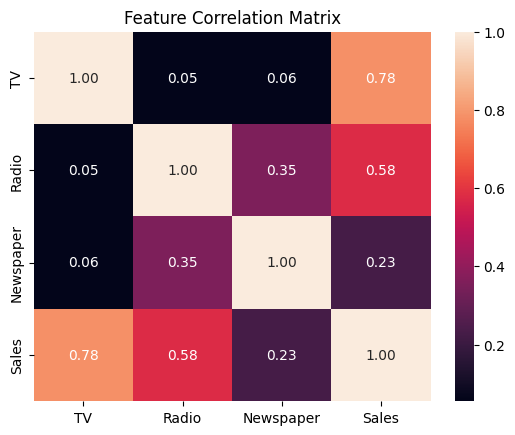

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = advertising.corr(method="pearson")

sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

快速判断“哪些特征和标签关系大致比较强”。

##### （2）斯皮尔曼相关系数（Spearman）

衡量两个变量之间的 **单调关系**（不要求线性），适合：

* 非线性关系；
* 数据不服从正态分布。

定义：把原始数据转换成“名次”（rank），再做皮尔逊相关。

当没有并列名次时，可用：

$$
\rho = 1 - \frac{6 \sum d_i^2}{n (n^2 - 1)}
$$

其中：

- $d_i$：两个变量在第 $i$ 个样本上的名次差
- $n$：样本数

**代码示例：**

In [3]:
import pandas as pd

# 每周学习时长
X = [[5], [8], [10], [12], [15], [3], [7], [9], [14], [6]]
# 数学考试成绩
y = [55, 65, 70, 75, 85, 50, 60, 72, 80, 58]

X = pd.DataFrame(X)
y = pd.Series(y)

print(X.corrwith(y, method="spearman"))
# 结果接近 0.99，说明高度正相关

0    0.987879
dtype: float64


当你怀疑“关系是单调但不一定线性”时，优先考虑 Spearman。

#### 3）主成分分析（PCA）示例

用 `sklearn.decomposition.PCA` 做降维：

* `n_components` 为小数：表示保留多少比例的总方差信息；
* `n_components` 为整数：表示保留多少个主成分维度。

**代码示例：**

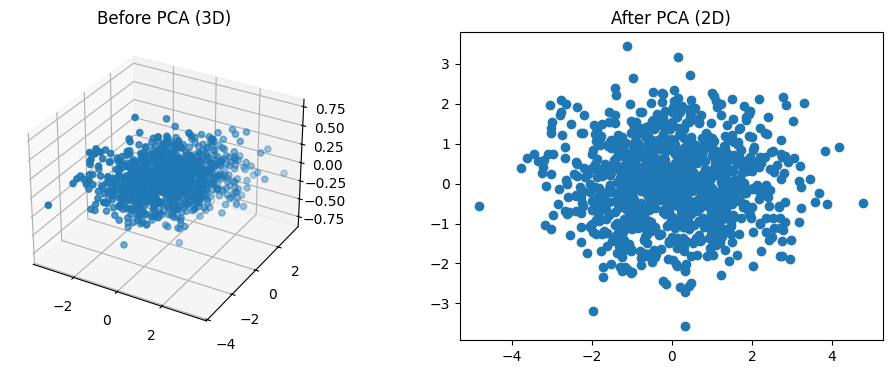

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_samples = 1000
# 第 1 个主成分方向
component1 = np.random.normal(0, 1, n_samples)
# 第 2 个主成分方向
component2 = np.random.normal(0, 0.2, n_samples)
# 噪声方向
noise = np.random.normal(0, 0.1, n_samples)

# 构造 3 维数据
X = np.vstack([
    component1 - component2,
    component1 + component2,
    component2 + noise
]).T

# 标准化
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# PCA 将 3 维降到 2 维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# 可视化
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.scatter(X[:, 0], X[:, 1], X[:, 2])
ax1.set_title("Before PCA (3D)")

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1])
ax2.set_title("After PCA (2D)")

plt.show()

数据维度特别高时，用 PCA 降维可以减少计算量，并帮助可视化。

## 2.5 模型评估和模型选择（重点）

### 2.5.1 损失函数

在监督学习中：

* 输入：`X`
* 模型：`f`
* 输出预测：`f(X)`
* 真实标签：`Y`

我们用 **损失函数（loss function）** 来衡量预测与真实之间的偏差：

$$
L(Y, f(X))
$$

常见损失函数：

1. **0-1 损失（0-1 loss）**（用于分类）

$$
L(Y, f(X)) =
\begin{cases}
1, & Y \ne f(X) \\
0, & Y = f(X)
\end{cases}
$$

2. **平方损失（square loss）**（用于回归）

$$
L(Y, f(X)) = (Y - f(X))^2
$$

3. **绝对损失（absolute loss）**

$$
L(Y, f(X)) = |Y - f(X)|
$$

4. **对数似然损失（log-loss / 交叉熵）**

二分类中常见形式之一（假设 \( p = P(Y=1 \mid X) \)）：

$$
L(Y, p) = - \left[ Y \log(p) + (1 - Y) \log(1 - p) \right]
$$

损失函数决定了我们要“优化什么”，不同任务选择不同损失。

### 2.5.2 经验误差与经验风险最小化

给定训练集：

$$
T = \{ (x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n) \}
$$

模型在训练集上的平均损失叫做 **经验误差 / 经验风险（empirical risk）**：

$$
R_{\text{emp}}(f)
= \frac{1}{n} \sum_{i=1}^{n} L\big(y_i, f(x_i)\big)
$$

在测试集上的平均误差叫 **测试误差 / 泛化误差（generalization error）**。

**经验风险最小化（ERM）** 思路：

> 在所有可选模型中，选一个让训练误差 `R_emp(f)` 最小的。

### 2.5.3 欠拟合与过拟合

* **欠拟合（Underfitting）**
  模型太简单，连训练集都拟合不好。

  * 训练误差：高
  * 测试误差：高

* **过拟合（Overfitting）**
  模型太复杂，把训练集“背下来了”，但对新数据表现很差。

  * 训练误差：低
  * 测试误差：高

本质原因：**模型复杂度不合适**（太低或太高）。

#### 代码示例：多项式拟合 `sin(x)`

findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because

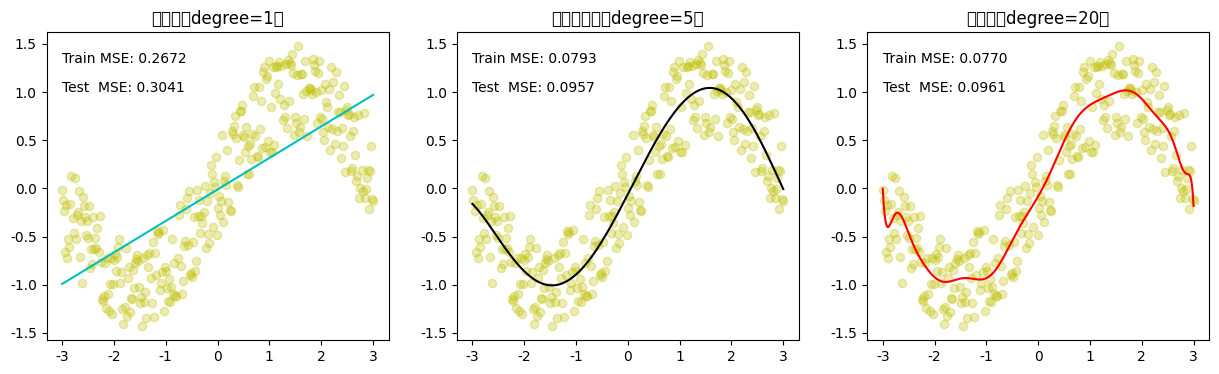

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False

def polynomial(x, degree):
    """构成多项式特征 [x^1, x^2, ..., x^degree]"""
    return np.hstack([x ** i for i in range(1, degree + 1)])

# 生成数据
X = np.linspace(-3, 3, 300).reshape(-1, 1)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, X.size).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# 欠拟合：一次多项式（直线）
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
ax[0].plot(X, y, "yo", alpha=0.3)
ax[0].plot(X, model.predict(X), "c")
ax[0].set_title("欠拟合（degree=1）")
ax[0].text(-3, 1.3, f"Train MSE: {mean_squared_error(y_train, model.predict(x_train)):.4f}")
ax[0].text(-3, 1.0, f"Test  MSE: {mean_squared_error(y_test, y_pred1):.4f}")

# 恰当拟合：五次多项式
x_train2 = polynomial(x_train, 5)
x_test2 = polynomial(x_test, 5)
model.fit(x_train2, y_train)
y_pred2 = model.predict(x_test2)
ax[1].plot(X, y, "yo", alpha=0.3)
ax[1].plot(X, model.predict(polynomial(X, 5)), "k")
ax[1].set_title("适中复杂度（degree=5）")
ax[1].text(-3, 1.3, f"Train MSE: {mean_squared_error(y_train, model.predict(x_train2)):.4f}")
ax[1].text(-3, 1.0, f"Test  MSE: {mean_squared_error(y_test, y_pred2):.4f}")

# 过拟合：二十次多项式
x_train3 = polynomial(x_train, 20)
x_test3 = polynomial(x_test, 20)
model.fit(x_train3, y_train)
y_pred3 = model.predict(x_test3)
ax[2].plot(X, y, "yo", alpha=0.3)
ax[2].plot(X, model.predict(polynomial(X, 20)), "r")
ax[2].set_title("过拟合（degree=20）")
ax[2].text(-3, 1.3, f"Train MSE: {mean_squared_error(y_train, model.predict(x_train3)):.4f}")
ax[2].text(-3, 1.0, f"Test  MSE: {mean_squared_error(y_test, y_pred3):.4f}")

plt.show()

**现象总结：**

* 次数太低：拟合太“直”，跟真实曲线差得远（欠拟合）；
* 次数适中：训练误差和测试误差都小（效果最好）；
* 次数太高：训练集表现非常好，但测试误差反而变大（过拟合）。

### 2.5.4 正则化（Regularization）

**正则化** = 在损失函数中加一个“惩罚项”，限制参数过大，从而控制模型复杂度，防止过拟合。

以线性回归 + 平方损失为例：

原始损失：

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^n (f(x_i) - y_i)^2
$$

加入 L2 正则化项：

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^n (f(x_i) - y_i)^2
+ \lambda \sum_j \omega_j^2
$$

- 前半部分：让模型尽量拟合训练数据
- 后半部分：惩罚过大的权重
- 其中 \( $\lambda \$) 是正则化系数，是一个 **超参数**，需要手动设定

#### 常见正则化

1. **L1 正则化（Lasso）**

$$
\text{Loss}_{L1} = \text{Loss}_{\text{原}} + \lambda \sum_j |\omega_j|
$$

- 使部分权重变为 0 → 自动完成“特征选择”
- 模型变得稀疏

2. **L2 正则化（Ridge / 岭回归）**

$$
\text{Loss}_{L2} = \text{Loss}_{\text{原}} + \lambda \sum_j \omega_j^2
$$

- 所有权重都变小，但通常不会变成 0
- 模型更平滑，不容易出现极端参数

3. **ElasticNet（L1 + L2 混合）**

$$
\text{Loss}_{\text{ElasticNet}}
= \text{Loss}_{\text{原}}
+ \lambda \left[
\alpha \sum_j |\omega_j|
+ \frac{1 - \alpha}{2} \sum_j \omega_j^2
\right]
$$

其中 $(0 \le \alpha \le 1)$。

- 同时具有 L1 的“稀疏性”和 L2 的“稳定性”


#### 正则化案例：多项式拟合 `sin(x)`

/Users/shenjiuyang/workspace/llm-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.212e+01, tolerance: 1.414e-02
  model = cd_fast.enet_coordinate_descent(
/Users/shenjiuyang/workspace/llm-learning/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.69681e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of th

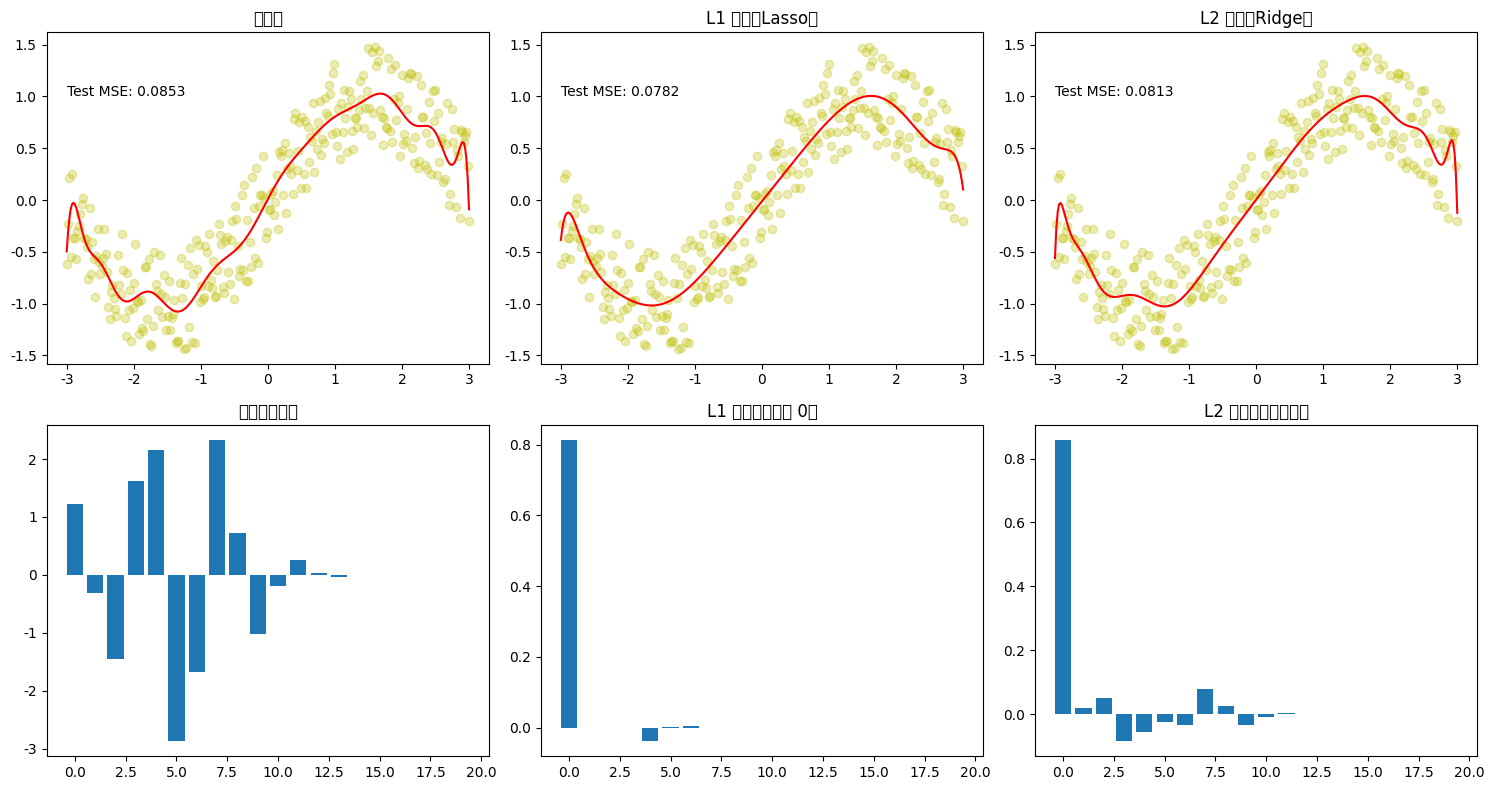

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False

def polynomial(x, degree):
    return np.hstack([x ** i for i in range(1, degree + 1)])

# 生成数据
X = np.linspace(-3, 3, 300).reshape(-1, 1)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, X.size).reshape(-1, 1)

# 切分数据
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 20 次多项式特征
x_train_poly = polynomial(x_train, 20)
x_test_poly = polynomial(x_test, 20)

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# 普通线性回归（无正则）
lr = LinearRegression()
lr.fit(x_train_poly, y_train)
y_pred_lr = lr.predict(x_test_poly)
ax[0, 0].plot(X, y, "yo", alpha=0.3)
ax[0, 0].plot(X, lr.predict(polynomial(X, 20)), "r")
ax[0, 0].set_title("无正则")
ax[0, 0].text(-3, 1.0, f"Test MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
ax[1, 0].bar(np.arange(20), lr.coef_.reshape(-1))
ax[1, 0].set_title("无正则的系数")

# L1 正则（Lasso）
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(x_train_poly, y_train)
y_pred_lasso = lasso.predict(x_test_poly)
ax[0, 1].plot(X, y, "yo", alpha=0.3)
ax[0, 1].plot(X, lasso.predict(polynomial(X, 20)), "r")
ax[0, 1].set_title("L1 正则（Lasso）")
ax[0, 1].text(-3, 1.0, f"Test MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
ax[1, 1].bar(np.arange(20), lasso.coef_)
ax[1, 1].set_title("L1 系数（大量为 0）")

# L2 正则（Ridge）
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_poly, y_train)
y_pred_ridge = ridge.predict(x_test_poly)
ax[0, 2].plot(X, y, "yo", alpha=0.3)
ax[0, 2].plot(X, ridge.predict(polynomial(X, 20)), "r")
ax[0, 2].set_title("L2 正则（Ridge）")
ax[0, 2].text(-3, 1.0, f"Test MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
ax[1, 2].bar(np.arange(20), ridge.coef_.reshape(-1))
ax[1, 2].set_title("L2 系数（整体变小）")

plt.tight_layout()
plt.show()

**现象：**

* 无正则：拟合曲线非常波动，系数很大，很容易过拟合；
* L1：许多系数变为 0，曲线更平滑，也更“简单”；
* L2：所有系数整体缩小，曲线平滑，但大多不会直接为 0。

### 2.5.5 交叉验证（Cross-Validation）

交叉验证用来 **更稳定地评估模型泛化性能**，减少一次性切分带来的偶然性。

1. **简单划分（Hold-out）**
   比如 70% 训练，30% 验证，一次切分。简单但不稳定。

2. **k 折交叉验证（k-Fold）**

   * 把数据平均分成 k 份（折）；
   * 每次用 k-1 折训练，用剩下 1 折验证；
   * 重复 k 次，取平均表现。

   实际中很常用，比如 `k=5` 或 `k=10`。

3. **留一交叉验证（LOO）**

   * 每次只留下 1 个样本做验证，其余 n-1 个样本做训练；
   * 共做 n 次。
     非常耗时，主要用于数据量很小的情况。

调超参数、比较不同模型时，优先使用 k 折交叉验证做评估。

## 2.6 模型求解算法

我们一般的目标是使 **（损失 + 正则化）最小**：

$$
\min_{\theta}
\left[
\frac{1}{n} \sum_{i=1}^n L\big(y_i, f_\theta(x_i)\big)
+ \lambda \, J(\theta)
\right]
$$

这是一个优化问题，会根据模型和损失函数采用不同的求解方式。

### 2.6.1 解析解（Analytical Solution）

只要目标函数足够简单，有时可以通过推导给出 **闭式解（closed-form solution）**：

- 优点：一次算出最优解
- 缺点：条件苛刻，特征多时矩阵求逆开销大

#### 线性回归最小二乘闭式解

设：

- $X$：训练数据矩阵，形状 $[n, d]$
- $y$：标签向量，形状 $[n, 1]$
- 模型：$ f(x) = X\beta $

最小化均方误差：

$$
\text{Loss}_{\text{MSE}}
= \frac{1}{n} (X\beta - y)^{T} (X\beta - y)
$$

对 $\beta$ 求导并令导数为 0，可得经典闭式解：

$$
\beta = (X^{T} X)^{-1} X^{T} y
$$

#### 岭回归（L2 正则化线性回归）闭式解

加入 L2 正则化项：

$$
\text{Loss}_{L2}
= \frac{1}{n} (X\beta - y)^{T} (X\beta - y)
+ \frac{\lambda}{n}  \beta^{T} \beta
$$

推导后得到闭式解：

$$
\beta = (X^{T} X + \lambda I)^{-1} X^{T} y
$$

其中 $I$ 是单位矩阵。因为 $\lambda I$ 像是在矩阵上加了一条 “山岭”，因此称为 **岭回归（Ridge Regression）**。


### 2.6.2 梯度下降法（Gradient Descent，重点）

梯度下降是一种 **迭代优化方法**：

$$
\theta_{k+1} = \theta_k - \alpha \nabla L(\theta_k)
$$

* $\nabla L(\theta_k)$：在当前参数 $\theta_k$ 处的梯度
* $\alpha$：学习率（step size），是超参数

特点：

* 优点：适用广泛、实现简单
* 缺点：收敛可能慢，可能停在局部最优

#### 常见三种形式

* **批量梯度下降（BGD）**
  每次用全部训练数据计算梯度。稳定但慢。

* **随机梯度下降（SGD）**
  每次只用 1 个样本更新。快但震荡大。

* **小批量梯度下降（Mini-batch）**
  每次用一个小批量（如 32、64 个样本）。实践中最常用。

#### 单变量梯度下降示例

目标：用梯度下降求解 $x^2 = 2$ 的近似解。

将其转化为最小化问题：

$$
J(x) = (x^2 - 2)^2
$$

计算导数：

$$
\frac{dJ}{dx} = 4x^3 - 8x
$$

迭代更新公式：

$$
x_{k+1} = x_k - \alpha (4x_k^3 - 8x_k)
$$

**代码示例：**

In [7]:
def J(x):
    """目标函数"""
    return (x**2 - 2) ** 2

def gradient(x):
    """梯度"""
    return 4 * x**3 - 8 * x

x = 1.0          # 初始值
alpha = 0.1      # 学习率

while (val := J(x)) > 1e-30:
    print(f"x={x:.6f}\tJ={val:.6e}")
    grad = gradient(x)
    x = x - alpha * grad

print("近似解 x ≈", x)

x=1.000000	J=1.000000e+00
x=1.400000	J=1.600000e-03
x=1.422400	J=5.392501e-04
x=1.409188	J=2.013530e-04
x=1.417186	J=7.084301e-05
x=1.412415	J=2.584712e-05
x=1.415287	J=9.229300e-06
x=1.413567	J=3.338701e-06
x=1.414601	J=1.198419e-06
x=1.413981	J=4.321866e-07
x=1.414353	J=1.554235e-07
x=1.414130	J=5.598776e-08
x=1.414264	J=2.014796e-08
x=1.414183	J=7.254914e-09
x=1.414232	J=2.611413e-09
x=1.414203	J=9.401856e-10
x=1.414220	J=3.384502e-10
x=1.414210	J=1.218457e-10
x=1.414216	J=4.386366e-11
x=1.414212	J=1.579109e-11
x=1.414214	J=5.684755e-12
x=1.414213	J=2.046520e-12
x=1.414214	J=7.367454e-13
x=1.414213	J=2.652287e-13
x=1.414214	J=9.548225e-14
x=1.414213	J=3.437363e-14
x=1.414214	J=1.237450e-14
x=1.414214	J=4.454822e-15
x=1.414214	J=1.603736e-15
x=1.414214	J=5.773449e-16
x=1.414214	J=2.078442e-16
x=1.414214	J=7.482390e-17
x=1.414214	J=2.693660e-17
x=1.414214	J=9.697175e-18
x=1.414214	J=3.490984e-18
x=1.414214	J=1.256753e-18
x=1.414214	J=4.524311e-19
x=1.414214	J=1.628754e-19
x=1.414214	J

### 2.6.3 牛顿法和拟牛顿法（了解）

牛顿法使用二阶导数（Hessian 矩阵）加速收敛：

$$
\theta_{k+1} = \theta_k - H(\theta_k)^{-1} \nabla L(\theta_k)
$$

* 收敛速度通常比梯度下降更快；
* 但需要计算和求逆 Hessian 矩阵，计算成本高；

**拟牛顿法（Quasi-Newton）**
使用“近似 Hessian”来减小计算量，是一种折中方案。

一般用于中小规模、凸优化问题。


## 2.7 模型评价指标（重点）

### 2.7.1 回归模型评价指标

设预测值为 $f(x_i)$，真实值为 $y_i$，样本数为 $n$。

1. **平均绝对误差（MAE）**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| f(x_i) - y_i \right|
$$

* 对异常值不敏感，解释直观；
* 适合存在较多异常点的场景。

2. **均方误差（MSE）**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \big( f(x_i) - y_i \big)^2
$$

* 对大误差更敏感（因为平方）；
* 常用且数学性质好。

3. **均方根误差（RMSE）**

$$
\text{RMSE}
= \sqrt{\text{MSE}}
= \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \big( f(x_i) - y_i \big)^2 }
$$

* 与目标变量量纲一致，便于解释。

4. **决定系数 $R^2$**

$$
R^2
= 1 -
\frac{ \sum_{i=1}^{n} \big( f(x_i) - y_i \big)^2 }
     { \sum_{i=1}^{n} \big( y_i - \bar{y} \big)^2 }
$$

其中 $\bar{y}$ 为样本均值。

* 越接近 1 表示模型解释能力越强；
* 对异常值敏感。


### 2.7.2 分类模型评价指标

#### 1）混淆矩阵（Confusion Matrix）

以二分类为例（以“猫”为正类）：

* TP（真正例）：真实是猫，预测也是猫；
* FP（假正例）：真实是狗，但预测为猫；
* TN（真负例）：真实是狗，预测也是狗；
* FN（假负例）：真实是猫，但预测为狗。

**代码示例：**


findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: KaiTi
findfont: Generic family 'sans-serif' not found because

   猫  狗
猫  5  1
狗  2  2


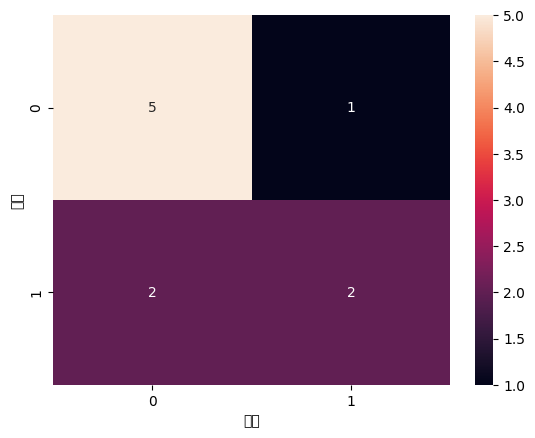

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["猫", "狗"]
y_true = ["猫", "猫", "猫", "猫", "猫", "猫", "狗", "狗", "狗", "狗"]
y_pred = ["猫", "猫", "狗", "猫", "猫", "猫", "猫", "猫", "狗", "狗"]

matrix = confusion_matrix(y_true, y_pred, labels=labels)
print(pd.DataFrame(matrix, index=labels, columns=labels))

sns.heatmap(matrix, annot=True, fmt="d")
plt.xlabel("预测")
plt.ylabel("真实")
plt.show()

#### 2）准确率（Accuracy）

$$
\text{Accuracy}
= \frac{TP + TN}{TP + TN + FP + FN}
$$

**sklearn 示例：**

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.7


#### 3）精确率（Precision）

$$
\text{Precision}
= \frac{TP}{TP + FP}
$$

预测为正类的样本中，**有多少是真的正类**。

In [10]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred, pos_label="猫")
print(precision)

0.7142857142857143


#### 4）召回率（Recall）

$$
\text{Recall}
= \frac{TP}{TP + FN}
$$

真实为正类的样本中，**有多少被正确预测成正类**。

In [11]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred, pos_label="猫")
print(recall)

0.8333333333333334


#### 5）F1 分数（F1 Score）

精确率和召回率的调和平均：

$$
F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}
         {\text{Precision} + \text{Recall}}
$$


In [12]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred, pos_label="猫")
print(f1)

0.7692307692307693


#### 6）分类报告（classification_report）

一次性查看每个类别的 Precision、Recall、F1 以及整体表现。

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 生成二分类数据
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=100
)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       144
           1       0.92      0.90      0.91       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



#### 7）ROC 曲线与 AUC

* **TPR（真正例率 / Recall）**

$$
\text{TPR}
= \frac{TP}{TP + FN}
$$

* **FPR（假正例率）**

$$
\text{FPR}
= \frac{FP}{FP + TN}
$$

**ROC 曲线**：以 FPR 为横轴，TPR 为纵轴，绘制不同阈值下的点。

**AUC（Area Under Curve）**：ROC 曲线下的面积，范围一般在 `[0.5, 1]`：

* AUC 越大，模型区分正负样本的能力越强；
* AUC = 0.5，基本等于随机猜。

**代码示例：**

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=100
)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

model = LogisticRegression()
model.fit(x_train, y_train)

# 预测正类概率
y_score = model.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, y_score)
print("AUC:", auc)

AUC: 0.9486734330484329


**本章小结：**

* 机器学习方法 = 模型 + 策略 + 算法；
* 特征工程是提升模型效果的核心工作，包括特征选择、转换、构造和降维；
* 模型评估要同时看训练误差和测试误差，注意欠拟合和过拟合；
* 正则化和交叉验证是对付过拟合的两大武器；
* 梯度下降、解析解、牛顿法等是求解最优参数的常见工具；
* 回归和分类各有一套常用评价指标，要根据任务选择合适的度量。